# Построить наилучшую среднеквадратичную линейную аппроксимацию для функции $f(x)=e^x, x \in [0;1]$

In [12]:
#всегдашний зачин
import sympy
import math
from sympy.matrices import Matrix
from sympy.abc import x,y
from sympy import *
init_printing( use_latex='mathjax' )
phi=symbols("\p")
g = Function("g")
h = Function("h")
f = Function("f")
er = symbols("er")
y=symbols("y")
x=symbols("x")
a=symbols("a")
b=symbols("b")

будем минимизировать величину $\varepsilon = \sqrt{\int_{a}^b[f(x)-g(x)]^2dx}$

In [13]:
f=exp(x)
f

 x
ℯ 

In [14]:
g=a*x+b
g

a⋅x + b

In [15]:
h=f-g
h

            x
-a⋅x - b + ℯ 

In [16]:
h=h*h
h

               2
⎛            x⎞ 
⎝-a⋅x - b + ℯ ⎠ 

In [17]:
h=integrate (h,(x,0,1))
h

 2                                       2
a                 2                 1   ℯ 
── + a⋅b - 2⋅a + b  - 2⋅ℯ⋅b + 2⋅b - ─ + ──
3                                   2   2 

In [18]:
h=sqrt(h)
h

     ____________________________________________
    ╱  2                                       2 
   ╱  a                 2                 1   ℯ  
  ╱   ── + a⋅b - 2⋅a + b  - 2⋅ℯ⋅b + 2⋅b - ─ + ── 
╲╱    3                                   2   2  

In [19]:
grad=Matrix([diff(h,a),diff(h,b)])
grad

⎡                    a   b                        ⎤
⎢                    ─ + ─ - 1                    ⎥
⎢                    3   2                        ⎥
⎢─────────────────────────────────────────────────⎥
⎢     ____________________________________________⎥
⎢    ╱  2                                       2 ⎥
⎢   ╱  a                 2                 1   ℯ  ⎥
⎢  ╱   ── + a⋅b - 2⋅a + b  - 2⋅ℯ⋅b + 2⋅b - ─ + ── ⎥
⎢╲╱    3                                   2   2  ⎥
⎢                                                 ⎥
⎢                  a                              ⎥
⎢                  ─ + b - ℯ + 1                  ⎥
⎢                  2                              ⎥
⎢─────────────────────────────────────────────────⎥
⎢     ____________________________________________⎥
⎢    ╱  2                                       2 ⎥
⎢   ╱  a                 2                 1   ℯ  ⎥
⎢  ╱   ── + a⋅b - 2⋅a + b  - 2⋅ℯ⋅b + 2⋅b - ─ + ── ⎥
⎣╲╱    3                                   2   2  ⎦

In [20]:
solution = solve(grad)
solution

{a: 18 - 6⋅ℯ, b: -10 + 4⋅ℯ}

In [21]:
Hessian=Matrix([[diff(diff(h,a),a),diff(diff(h,a),b)],[diff(diff(h,b),a),diff(diff(h,b),b)]])
Hessian

⎡           ⎛  a   b    ⎞ ⎛a   b    ⎞                                         
⎢           ⎜- ─ - ─ + 1⎟⋅⎜─ + ─ - 1⎟                                         
⎢           ⎝  3   2    ⎠ ⎝3   2    ⎠                                       1 
⎢─────────────────────────────────────────────── + ───────────────────────────
⎢                                            3/2          ____________________
⎢⎛ 2                                       2⎞            ╱  2                 
⎢⎜a                 2                 1   ℯ ⎟           ╱  a                 2
⎢⎜── + a⋅b - 2⋅a + b  - 2⋅ℯ⋅b + 2⋅b - ─ + ──⎟      3⋅  ╱   ── + a⋅b - 2⋅a + b 
⎢⎝3                                   2   2 ⎠        ╲╱    3                  
⎢                                                                             
⎢         ⎛  a   b    ⎞ ⎛a            ⎞                                       
⎢         ⎜- ─ - ─ + 1⎟⋅⎜─ + b - ℯ + 1⎟                                       
⎢         ⎝  3   2    ⎠ ⎝2            ⎠             

In [22]:
Hessian_at_point=Hessian.subs(solve(grad))
Hessian_at_point

⎡                                                1                            
⎢─────────────────────────────────────────────────────────────────────────────
⎢       ______________________________________________________________________
⎢      ╱                                                    2                 
⎢     ╱    113                                2   (18 - 6⋅ℯ)                  
⎢3⋅  ╱   - ─── - 2⋅ℯ⋅(-10 + 4⋅ℯ) + (-10 + 4⋅ℯ)  + ─────────── + (-10 + 4⋅ℯ)⋅(1
⎢  ╲╱       2                                          3                      
⎢                                                                             
⎢                                                1                            
⎢─────────────────────────────────────────────────────────────────────────────
⎢       ______________________________________________________________________
⎢      ╱                                                    2                 
⎢     ╱    113                                2   (1

In [23]:
Hessian_at_point[0] > 0

True

In [24]:
det(Hessian_at_point) > 0

True

По Критерию Сильвестра матрица положительно определна, а значит что на значениях

In [25]:
solution

{a: 18 - 6⋅ℯ, b: -10 + 4⋅ℯ}

In [31]:
f=solution[a]*x+solution[b]

$\varepsilon$ достигает соего минимума

### Ответ : $g(x)=(18-6e)x+(-10+4e)$

### График

In [42]:
from sympy import lambdify

lam_x = lambdify(x, f, modules=['numpy'])

x_vals = np.linspace(0, 1, 10)
y_vals = lam_x(x_vals)

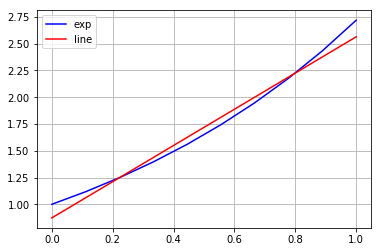

In [50]:
import numpy as np
import matplotlib.pyplot as plt
Xes = np.linspace(0, 1, 10)
Ys = np.exp(Xes)
plt.plot(Xes,Ys,c='b',label='exp')
plt.plot(x_vals,y_vals, c='r',label='line')
plt.grid(b=1, which='major', axis='both')
plt.legend()